<font size="5">


--------------------------------------------------------
##### Markov Chain, @CH 25 OCT 2023
##### Predicting biodiversity presence-absence in a network of ponds with time-dependent transition dispersal matrix
--------------------------------------------------------


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
   Installed NLopt ───── v1.2.1
   Installed NLopt_jll ─ v2.10.0+0
   Installed QuantEcon ─ v0.16.8
    Updating `~/.julia/environments/v1.11/Project.toml`
  [fcd29c91] + QuantEcon v0.16.8
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [76087f3c] + NLopt v1.2.1
  [fcd29c91] + QuantEcon v0.16.8
  [079eb43e] + NLopt_jll v2.10.0+0
Precompiling project...
    519.1 ms  ✓ NLopt_jll
    649.0 ms  ✓ NLopt
   2047.1 ms  ✓ QuantEcon
  3 dependencies successfully precompiled in 4 seconds. 602 already precompiled.


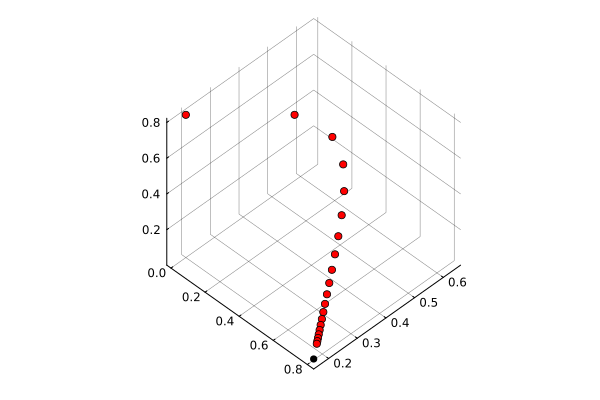

In [1]:
#This first lines import necessary packages
import Pkg; Pkg.add("Plots") 
import Pkg; Pkg.add("QuantEcon")
using Plots
using QuantEcon 
#TOREAD: https://julia.quantecon.org/introduction_dynamics/finite_markov.html
#TOREAD: https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/
#P = [0.9 0.1 0.0; 0.4 0.4 0.2; 0.1 0.1 0.8];#Dispersal matrix at time t
#mc = MarkovChain(P)
#is_irreducible(mc)

P = [0.971 0.029 0.000
     0.145 0.778 0.077
     0.000 0.508 0.492] # stochastic dispersal matrix

psi = [0.0 0.2 0.8] # initial distribution (presence absence) = one species

t = 20 # path length
x_vals = zeros(t)
y_vals = similar(x_vals)
z_vals = similar(x_vals)
colors = [repeat([:red], 20); :black] # for plotting

for i in 1:t
    x_vals[i] = psi[1]
    y_vals[i] = psi[2]
    z_vals[i] = psi[3]
    psi = psi * P # update distribution
end

mc = MarkovChain(P)
psi_star = stationary_distributions(mc)[1]
x_star, y_star, z_star = psi_star # unpack the stationary dist
plt = scatter([x_vals; x_star], [y_vals; y_star], [z_vals; z_star], color = colors,gridalpha = 0.5, legend = :none)
plot!(plt, camera = (45, 45))


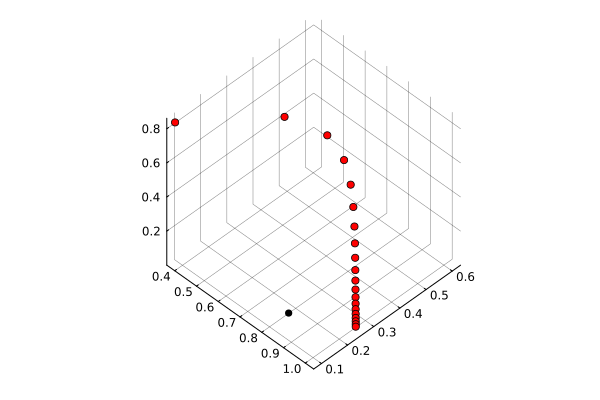

In [2]:
using Random
using Plots
using QuantEcon #TOREAD: https://julia.quantecon.org/introduction_dynamics/finite_markov.html


S=1
for s = 1:2 #S species
psi = rand(Float64, (1, 3))
#psi = [0.0 0.2 0.8] # initial distribution (presence absence) = one species

P = [0.971 0.029 0.000
     0.145 0.778 0.077
     0.000 0.508 0.492] # stochastic matrix (Dispersal matrix) == P square matrix, size P = number ponds
#P = [0.9 0.1 0.0; 0.4 0.4 0.2; 0.1 0.1 0.8];#Dispersal matrix at time t
mc = MarkovChain(P)
is_irreducible(mc)


t = 20 # path length
x_vals = zeros(t)
y_vals = similar(x_vals)
z_vals = similar(x_vals)
colors = [repeat([:red], 20); :black] # for plotting

for i in 1:t
    x_vals[i] = psi[1]
    y_vals[i] = psi[2]
    z_vals[i] = psi[3]
    psi = psi * P # update distribution
end

end
mc = MarkovChain(P)
psi_star = stationary_distributions(mc)[1]
x_star, y_star, z_star = psi_star # unpack the stationary dist
plt = scatter([x_vals; x_star], [y_vals; y_star], [z_vals; z_star], color = colors,gridalpha = 0.5, legend = :none)
plot!(plt, camera = (45, 45))

